In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

df = pd.read_csv('clean_data.csv')
df

,Unnamed: 0,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team,favorite,winner,net_score,favorite_correct
0,1,1/21/1979,1978,Superbowl,True,Dallas Cowboys,31,35,Pittsburgh Steelers,PIT,...,True,71.0,18.0,84.0,rain,Pittsburgh Steelers,away,away,-4,correct
1,2,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31,16,Detroit Lions,TB,...,False,79.0,9.0,87.0,NaN,Tampa Bay Buccaneers,home,home,15,correct
2,3,9/2/1979,1979,1,False,Buffalo Bills,7,9,Miami Dolphins,MIA,...,False,74.0,15.0,74.0,NaN,Miami Dolphins,away,away,-2,correct
3,4,9/2/1979,1979,1,False,Chicago Bears,6,3,Green Bay Packers,CHI,...,False,78.0,11.0,68.0,NaN,Chicago Bears,home,home,3,correct
4,5,9/2/1979,1979,1,False,Denver Broncos,10,0,Cincinnati Bengals,DEN,...,False,69.0,6.0,38.0,NaN,Denver Broncos,home,home,10,correct
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10982,10983,9/17/2023,2023,2,False,Tampa Bay Buccaneers,27,17,Chicago Bears,TB,...,False,NaN,NaN,NaN,NaN,Tampa Bay Buccaneers,home,home,10,correct
10983,10984,9/17/2023,2023,2,False,Tennessee Titans,27,24,Los Angeles Chargers,LAC,...,False,NaN,NaN,NaN,NaN,Los Angeles Chargers,away,home,3,wrong
10984,10985,9/18/2023,2023,2,False,Carolina Panthers,17,20,New Orleans Saints,NO,...,False,NaN,NaN,NaN,NaN,New Orleans Saints,away,away,-3,correct
10985,10986,9/18/2023,2023,2,False,Pittsburgh Steelers,26,22,Cleveland Browns,CLE,...,False,NaN,NaN,NaN,NaN,Cleveland Browns,away,home,4,wrong


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import make_regression

def simple_regression_plot(model):
    '''
    Plot example of regression model on constructed data with a single feature.
    '''
    X, y = make_regression(n_features = 1, noise = 12, random_state = 15)
    
    # fit the model *in place*
    model.fit(X, y)
    y_preds = model.predict(X)
    
    sns.scatterplot(x = X.reshape(-1), y = y, label = 'training data')
    sns.lineplot(x = X.reshape(-1), y = y_preds, label = 'predictions', color = 'orange')

In [3]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [4]:
features = ['score_home','score_away','over_under_line']
X = df_train[features]
y = df_train['spread_favorite']

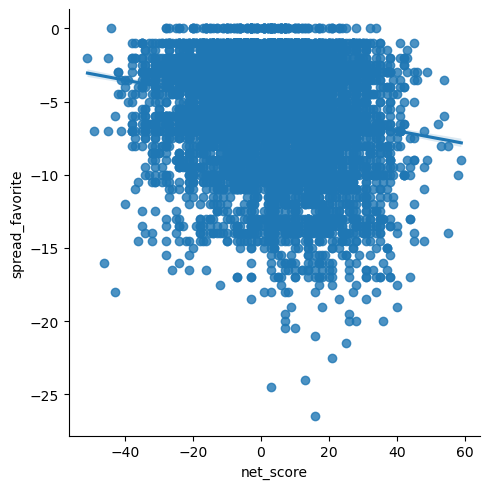

In [5]:
sns.lmplot(data=df, x='net_score', y='spread_favorite')

<Axes: xlabel='favorite_correct', ylabel='Count'>

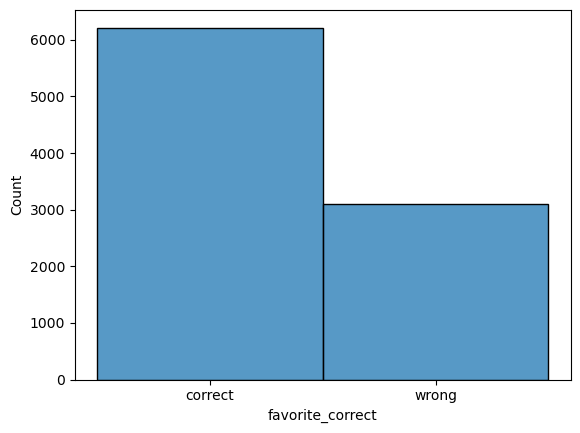

In [6]:
a = df['favorite_correct']
sns.histplot(a)

In [7]:
correct = 0
wrong = 0
for i in df['favorite_correct'].index:
    if df['favorite_correct'].iloc[i] == 'correct':
        correct += 1
    elif df['favorite_correct'].iloc[i] == 'wrong':
        wrong += 1

In [8]:
total = correct + wrong
correct_percent = correct/total
correct_percent

0.6673107890499195

In [9]:
df1 = pd.read_csv('d2.csv')
df1 = df1.dropna()


In [10]:
filter_1 = 3
filter_2 = 5
df1['O_difference_3'] = 0
df1['Wu_difference_3'] = 0
df1['O_difference_5'] = 0
df1['Wu_difference_5'] = 0


In [11]:
df1['Spread_flipp'] = -df1['Spread']

In [12]:
for i in range(2566):
    if (abs(df1['Spread_flipp'].iloc[i]-df1['OsbournM'].iloc[i])>filter_1):
        df1.loc[i, 'O_difference_3'] = 1
    else:
        df1.loc[i, 'O_difference_3'] = 0

In [13]:
for i in range(2566):
    if (abs(df1['Spread_flipp'].iloc[i]-df1['WuM'].iloc[i])>filter_1):
        df1.loc[i,'Wu_difference_3'] = 1
    else:
        df1.loc[i,'Wu_difference_3'] = 0

In [14]:
for i in range(2566):
    if (abs(df1['Spread_flipp'].iloc[i]-df1['OsbournM'].iloc[i])>filter_2):
        df1.loc[i, 'O_difference_5'] = 1
    else:
        df1.loc[i, 'O_difference_5'] = 0

In [15]:
for i in range(2566):
    if (abs(df1['Spread_flipp'].iloc[i]-df1['WuM'].iloc[i])>filter_2):
        df1.loc[i,'Wu_difference_5'] = 1
    else:
        df1.loc[i,'Wu_difference_5'] = 0

In [16]:
df1['O_bet_3'] = 0
df1['Wu_bet_3'] = 0
df1['O_bet_5'] = 0
df1['Wu_bet_5'] = 0


In [17]:
for i in range(2566):
    if (df1.loc[i, 'O_difference_3'] == 1):
        if(df1.loc[i, 'OsbournM'] - df1.loc[i, 'Spread_flipp'] > 0):
            df1.loc[i, 'O_bet_3'] = "H"
        else:
            df1.loc[i, 'O_bet_3'] = "V"
    else:
        df1.loc[i, 'O_bet_3'] = "0"

In [18]:
for i in range(2566):
    if (df1.loc[i, 'Wu_difference_3'] == 1):
        if(df1.loc[i, 'WuM'] - df1.loc[i, 'Spread_flipp'] > 0):
            df1.loc[i, 'Wu_bet_3'] = "H"
        else:
            df1.loc[i, 'Wu_bet_3'] = "V"
    else:
        df1.loc[i, 'Wu_bet_3'] = "0"

In [19]:
for i in range(2566):
    if (df1.loc[i, 'O_difference_5'] == 1):
        if(df1.loc[i, 'OsbournM'] - df1.loc[i, 'Spread_flipp'] > 0):
            df1.loc[i, 'O_bet_5'] = "H"
        else:
            df1.loc[i, 'O_bet_5'] = "V"
    else:
        df1.loc[i, 'O_bet_5'] = "0"

In [20]:
for i in range(2566):
    if (df1.loc[i, 'Wu_difference_5'] == 1):
        if(df1.loc[i, 'WuM'] - df1.loc[i, 'Spread_flipp'] > 0):
            df1.loc[i, 'Wu_bet_5'] = "H"
        else:
            df1.loc[i, 'Wu_bet_5'] = "V"
    else:
        df1.loc[i, 'Wu_bet_5'] = "0"

In [21]:
df1['O_win_3'] = 0
df1['Wu_win_3'] = 0
df1['O_win_5'] = 0
df1['Wu_win_5'] = 0

In [31]:
for i in range(2566):
    if df1.loc[i, 'O_bet_3'] == '0':
        df1.loc[i, 'O_win_3'] = 'N'
    elif df1.loc[i, 'O_bet_3'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'O_win_3'] = 'W'
    elif df1.loc[i, 'O_bet_3'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'O_win_3'] = 'L'    
    elif df1.loc[i, 'O_bet_3'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'O_win_3'] = 'W'
    elif df1.loc[i, 'O_bet_3'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'O_win_3'] = 'L'

In [33]:
for i in range(2566):
    if df1.loc[i, 'Wu_bet_3'] == '0':
        df1.loc[i, 'Wu_win_3'] = 'N'
    elif df1.loc[i, 'Wu_bet_3'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'Wu_win_3'] = 'W'
    elif df1.loc[i, 'Wu_bet_3'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'Wu_win_3'] = 'L'    
    elif df1.loc[i, 'Wu_bet_3'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'Wu_win_3'] = 'W'
    elif df1.loc[i, 'Wu_bet_3'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'Wu_win_3'] = 'L'

In [34]:
for i in range(2566):
    if df1.loc[i, 'O_bet_5'] == '0':
        df1.loc[i, 'O_win_5'] = 'N'
    elif df1.loc[i, 'O_bet_5'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'O_win_5'] = 'W'
    elif df1.loc[i, 'O_bet_5'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'O_win_5'] = 'L'    
    elif df1.loc[i, 'O_bet_5'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'O_win_5'] = 'W'
    elif df1.loc[i, 'O_bet_5'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'O_win_5'] = 'L'

In [35]:
for i in range(2566):
    if df1.loc[i, 'Wu_bet_5'] == '0':
        df1.loc[i, 'Wu_win_5'] = 'N'
    elif df1.loc[i, 'Wu_bet_5'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'Wu_win_5'] = 'W'
    elif df1.loc[i, 'Wu_bet_5'] == 'H' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'Wu_win_5'] = 'L'    
    elif df1.loc[i, 'Wu_bet_5'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] < 0:
        df1.loc[i, 'Wu_win_5'] = 'W'
    elif df1.loc[i, 'Wu_bet_5'] == 'V' and df1.loc[i, 'Nethomepoints'] - df1.loc[i, 'Spread_flipp'] > 0:
        df1.loc[i, 'Wu_win_5'] = 'L'

In [63]:
for i in range(2566):
    if df1.loc[i, 'O_win_3'] == '0' or df1.loc[i, 'O_win_3'] == 0:
        df1.loc[i, 'O_win_3'] == 'N'

In [64]:
for i in range(2566):
    if df1.loc[i, 'Wu_win_3'] == '0' or df1.loc[i, 'Wu_win_3'] == 0:
        df1.loc[i, 'Wu_win_3'] == 'N'

In [65]:
for i in range(2566):
    if df1.loc[i, 'O_win_5'] == '0' or df1.loc[i, 'O_win_5'] == 0:
        df1.loc[i, 'O_win_5'] == 'N'

In [66]:
for i in range(2566):
    if df1.loc[i, 'Wu_win_5'] == '0' or df1.loc[i, 'Wu_win_5'] == 0:
        df1.loc[i, 'Wu_win_5'] == 'N'

<Axes: xlabel='Wu_win_5', ylabel='count'>

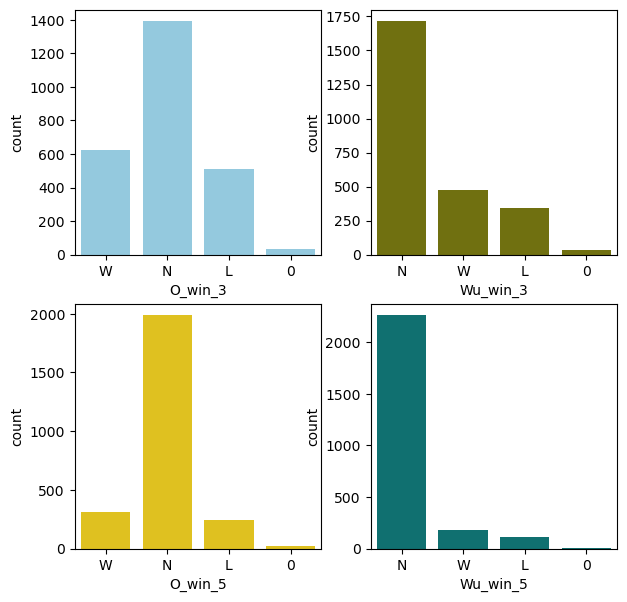

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(7, 7))
sns.countplot(data = df1, x = 'O_win_3', color="skyblue", ax=axs[0, 0])
sns.countplot(data = df1, x = 'Wu_win_3', color="olive", ax=axs[0, 1])
sns.countplot(data = df1, x = 'O_win_5', color="gold", ax=axs[1, 0])
sns.countplot(data = df1, x = 'Wu_win_5', color="teal", ax=axs[1, 1])

In [68]:
df1.to_excel("df.xlsx")
